In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.datasets import load_boston

## Load data

In [4]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [96]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# Load column names
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']

In [6]:
# Add price column
bos['PRICE'] = boston.target

In [9]:
bos.columns = cols

In [10]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [104]:
bos.shape

(506, 14)

## Data analysis

In [106]:
# Check for null values
bos.isnull().values.any()

False

In [107]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data visualization

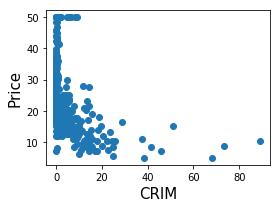

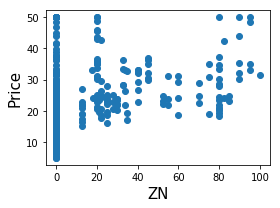

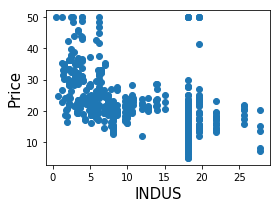

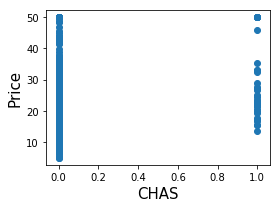

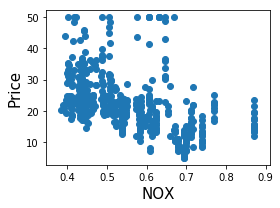

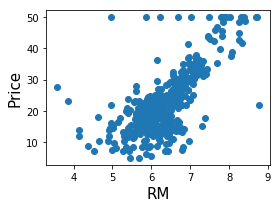

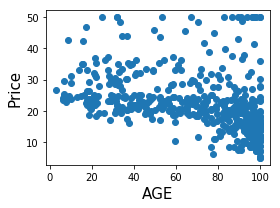

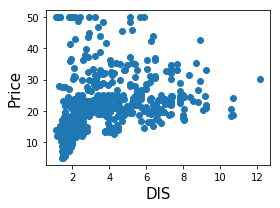

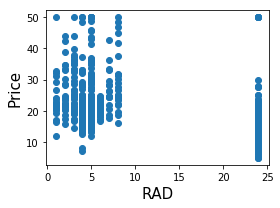

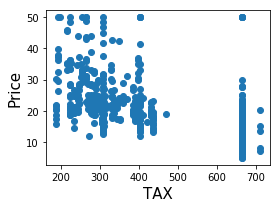

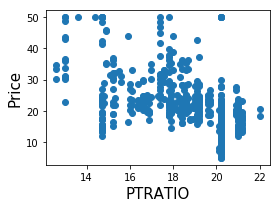

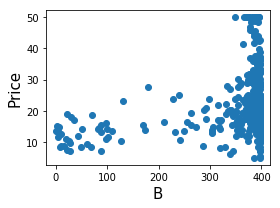

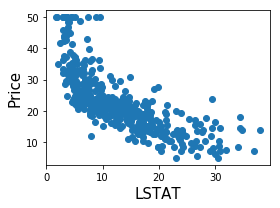

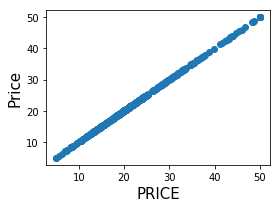

In [120]:
for index, feature_name in enumerate(bos.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(bos.values[:, index], bos.PRICE)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

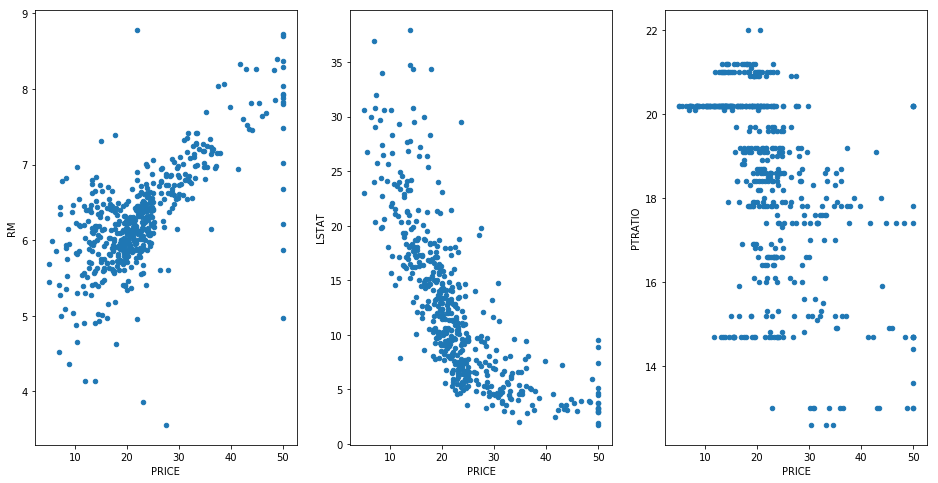

In [121]:
fig, axs = plt.subplots(1,3,sharex=True)
bos.plot(kind = 'scatter',x='PRICE',y='RM',ax=axs[0],figsize=(16,8))
bos.plot(kind = 'scatter',x='PRICE',y='LSTAT',ax=axs[1])
bos.plot(kind = 'scatter',x='PRICE',y='PTRATIO',ax=axs[2])

### Define X and Y

In [11]:
feature_cols = ['RM','PTRATIO','LSTAT']
x = bos[feature_cols]
y = bos.PRICE

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [13]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(lm.intercept_)
print(lm.coef_)

18.567111505395232
[ 4.51542094 -0.93072256 -0.57180569]


In [15]:
x_new = pd.DataFrame({'RM': [bos.RM.min(),bos.RM.max()],
                      'PTRATIO': [bos.PTRATIO.min(),bos.PTRATIO.max()],
                      'LSTAT': [bos.LSTAT.min(),bos.LSTAT.max()]})

In [16]:
x_new

,RM,PTRATIO,LSTAT
0,3.561,12.6,1.73
1,8.780,22.0,37.97


In [17]:
pred_new = lm.predict(x_new)
pred_new

array([21.93019745, 16.02514921])

In [18]:
import statsmodels.formula.api as smf

In [19]:
lm = smf.ols(formula = 'PRICE ~ RM',data=bos).fit()
lm.conf_int()

,0,1
Intercept,-39.876641,-29.464601
RM,8.278855,9.925363


In [20]:
lm.pvalues

Intercept    6.950229e-34
RM           2.487229e-74
dtype: float64

In [152]:
lm.rsquared

0.4835254559913341

In [153]:
lm = smf.ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT',data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sat, 14 Jul 2018   Prob (F-statistic):          2.69e-123
Time:                        22:58:40   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5671      3.913      4.745      0.000      10.879      26.255
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm = smf.ols(formula = 'PRICE ~ RM+PTRATIO+LSTAT',data=bos).fit()
lm.rsquared

0.6786241601613112

In [156]:
lm = smf.ols(formula = 'PRICE ~ RM+PTRATIO',data=bos).fit()
lm.rsquared

0.5612534621272917

In [157]:
lm = smf.ols(formula = 'PRICE ~ RM+LSTAT',data=bos).fit()
lm.rsquared

0.6385616062603403

#### From above results, we are getting better accuarcy when we consider RM,PTRATIO,LSTAT fields

In [22]:
A = bos.drop('PRICE', axis=1)

### Split train and test data

In [23]:
X_train = A[:-50]
X_test = A[-50:]
Y_train = bos.PRICE[:-50]
Y_test = bos.PRICE[-50:]

In [166]:
X_train.shape

(456, 13)

In [168]:
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50, 13)
(456,)
(50,)


In [24]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( A, bos.PRICE, test_size=0.33, random_state=5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [25]:
# Predict model
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [26]:
pred_train

array([13.16072876, 30.41654502, 13.56155988, 24.31597165, 20.60168017,
       13.46387418, 21.76426391, 14.29672518, 18.67601405, 22.10577161,
       33.44477729, 22.2740404 , 16.75294142, 30.87966613, 38.66148617,
       26.57778954, 25.99126956, 15.35860394, 15.67520649, 35.95582476,
       22.92948499, 33.62881167, 25.25458364, 20.8096454 , 16.91681516,
       23.39903742, 19.61377584, 30.37720465, 16.45581802, 25.54233718,
       26.6049999 , 23.78419935, 22.54074716, 32.88679588, 18.80357047,
       30.8730697 , 28.74500977, 13.33362726, 32.85170742, 27.37305898,
       19.60104079, 35.61043567, 14.57285385, 24.87494438, 28.32207238,
       22.36707385, 18.64003623, 20.92428707, 25.08035664, 19.71238517,
       32.14571068, 23.72852497, 19.35132712,  7.08362216,  5.4553063 ,
       22.25378614, 19.79507316, 20.53115261, 21.34785006, 17.67547237,
       31.13739933, 37.74282622, 20.08836416, 13.18689564, 27.1041762 ,
       16.64218913, 25.03437517, 18.4183762 , 24.02139217, 14.97

In [27]:
pred_test

array([37.46723562, 31.39154701, 27.1201962 ,  6.46843347, 33.62966737,
        5.67067989, 27.03946671, 29.92704748, 26.35661334, 22.45246021,
       32.20504441, 21.78641653, 23.41138441, 33.60894362, 28.28619511,
       15.13859055,  0.30087325, 18.71850376, 14.4706712 , 11.10823598,
        2.69494197, 19.21693734, 38.41159345, 24.36936442, 31.61493439,
       11.42210397, 24.92862188, 23.31178043, 22.7764079 , 20.65081211,
       16.035198  ,  7.07978633, 17.65509209, 22.81470561, 29.21943405,
       18.61354566, 28.37701843,  8.80516873, 41.65140459, 34.02910176,
       20.1868926 ,  3.95600857, 29.69124564, 12.18081256, 27.19403498,
       30.63699231, -6.24952457, 19.9462404 , 21.55123979, 13.36478173,
       20.39068171, 19.87353324, 23.57656877, 13.40141285, 17.66457201,
       24.77424747, 35.31476509, 15.48318159, 28.50764575, 21.72575404,
       20.58142839, 26.08460856, 14.51816968, 32.37494056, 20.80917392,
       12.18932524, 19.45551285, 25.23390429, 21.77302317, 21.30

In [179]:
#Calculate Mean Squared Error-train dataset
np.mean((Y_train-lm.predict(X_train)) ** 2)

19.546758473534684

In [180]:
#Calculate Mean Squared Error-test dataset
np.mean((Y_test-lm.predict(X_test)) ** 2)

28.541367275618345